   Capacity (KB)  Total Area (um^2)  Total Area (um^2)  Total Area (um^2)  \
0             16            99060.7          70316.972            99060.7   
1             32           164425.0         140633.944           164425.0   
2             64           167720.0          72897.909           167720.0   
3            128           174163.0         145795.817           174163.0   
4            256           104569.0          91158.558           104569.0   
5            512           174956.0         256288.978           174956.0   
6           1024           136754.0         239589.012           136754.0   
7           2048           239083.0         327564.767           239083.0   
8           4096           161466.0         655129.534           161466.0   

   Total Area (um^2)  
0            71774.9  
1           143550.0  
2           281498.0  
3           562996.0  
4          1118050.0  
5          2236090.0  
6          4442930.0  
7          4373370.0  
8         17713700.0  

SystemExit: 

/opt/homebrew/Cellar/jupyterlab/3.2.5/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


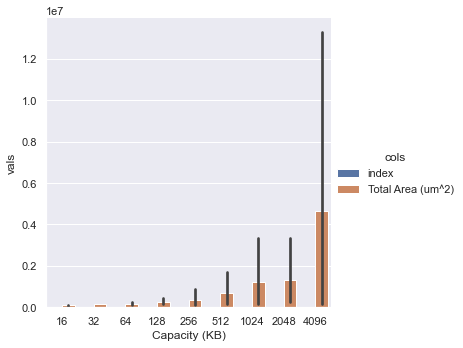

In [258]:
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns
import sys



# read in csv reports as dataframes
global df_nvs_2d, df_dst_2d, df_dst_hd
df_nvs_2d = pd.read_csv("NVSim_report.csv")
df_dst_2d = pd.read_csv("Destiny_report.csv")
df_dst_hd = pd.read_csv("HD_Destiny_report.csv")


# n*[0:8] =   STTRAM
# n*[9:17] =  SRAM
# n*[18:26] = RRAM
# n*[27:35] = PCRAM


sns.set() # set sns as default style


# set type to any plot type in the seaborn reference: https://seaborn.pydata.org/api.html
def graph(plot_type, xax, yax, df):
    ax = getattr(sns, plot_type)(x=xax, y=yax, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.rcParams["xtick.labelsize"] = 7
    plt.xlabel(xax); plt.ylabel(yax)
    plt.title(xax + " vs " + yax)
    plt.tight_layout(); plt.show()


# expects 36 row dataframe
def plot_4x2_boxplot(dataframe, xaxis, title, cell_type=None, savefile=None):
    if len(dataframe) % 9 != 0:
        print(f'\nexpecting dataframe lengths in multiples of 9\n'); sys.exit(-1)
    if cell_type   == 'STTRAM':  dataframe = dataframe.loc[0:8]
    elif cell_type ==   'SRAM':  dataframe = dataframe.loc[9:17]
    elif cell_type ==   'RRAM':  dataframe = dataframe.loc[18:26]
    elif cell_type ==  'PCRAM':  dataframe = dataframe.loc[27:35]
    
    if cell_type is not None: title = f'{cell_type}: {title}'
    
    plt.subplots(4, 2, figsize=(24, 18))
    # fig.suptitle(f'{title}')

    # sns.boxplot(ax=axes[0, 0], data=dataframe, x=f'{xaxis}', y='Total Area (um^2)', labels=['STTRAM', 'SRAM', 'RRAM', 'PCRAM'])
    sns.boxplot(ax=axes[0, 0], data=dataframe, x=f'{xaxis}', y='Total Area (um^2)')
    sns.boxplot(ax=axes[0, 1], data=dataframe, x=f'{xaxis}', y='Leakage Power (uW)')   
    sns.boxplot(ax=axes[1, 0], data=dataframe, x=f'{xaxis}', y='Read Latency (ns)')
    sns.boxplot(ax=axes[1, 1], data=dataframe, x=f'{xaxis}', y='Write Latency (ns)')
    sns.boxplot(ax=axes[2, 0], data=dataframe, x=f'{xaxis}', y='Read Bandwidth (GB/s)')    
    sns.boxplot(ax=axes[2, 1], data=dataframe, x=f'{xaxis}', y='Write Bandwidth (GB/s)')
    sns.boxplot(ax=axes[3, 0], data=dataframe, x=f'{xaxis}', y='Read Dynamic Energy (pJ)')
    sns.boxplot(ax=axes[3, 1], data=dataframe, x=f'{xaxis}', y='Write Dynamic Energy (pJ)')
    
    if savefile: plt.savefig(savefile)



def test_multiplot():
    # Read Latency Optimized - RRAM cells
    xaxis = df_dst_2d.loc[18:26]["Capacity (KB)"]
    df_dst_2d_opt_r_lat_RRAM = df_dst_2d.loc[18:26]["Total Area (um^2)"]  # SLC RRAM
    df_nvs_2d_opt_r_lat_RRAM = df_nvs_2d.loc[18:26]["Total Area (um^2)"]  # SLC RRAM
    df_dst_3d_opt_r_lat = df_dst_hd.loc[0:8]["Total Area (um^2)"]         # 3D  RRAM
    df_dst_mlc_opt_r_lat = df_dst_hd.loc[72:80]["Total Area (um^2)"]      # MLC RRAM

    df = pd.concat([xaxis.reset_index(drop=True), df_dst_2d_opt_r_lat_RRAM.reset_index(drop=True), df_nvs_2d_opt_r_lat_RRAM.reset_index(drop=True), df_dst_3d_opt_r_lat.reset_index(drop=True), df_dst_mlc_opt_r_lat.reset_index(drop=True)], ignore_index=True, join="outer", axis=1)
    
    df.columns = ["Capacity (KB)", "Total Area (um^2)", "Total Area (um^2)", "Total Area (um^2)", "Total Area (um^2)"] # headers
    # df.columns = ["Capacity (KB)", "df0: Total Area (um^2)", "df1: Total Area (um^2)", "df2: Total Area (um^2)", "df3: Total Area (um^2)"] # headers
    
    print(df)
    
    
    # sns.boxplot(data=df, x="Capacity (KB)", columns=["Total Area (um^2)", "Total Area (um^2)", "Total Area (um^2)", "Total Area (um^2)"])
    # sns.boxplot(data=df, x="Capacity (KB)", y=["df0: Total Area (um^2)", "df1: Total Area (um^2)", "df2: Total Area (um^2)", "df3: Total Area (um^2)"])
    # sns.boxplot(x=df["Capacity (KB)"], y=[df["df0: Total Area (um^2)"], df["df1: Total Area (um^2)"], df["df2: Total Area (um^2)"], df["df3: Total Area (um^2)"]])
    # sns.boxplot(data=df, x="Capacity (KB)", y=["df0: Total Area (um^2)", "df1: Total Area (um^2)", "df2: Total Area (um^2)", "df3: Total Area (um^2)"])
    # sns.boxplot(data=df, x="Capacity (KB)", y="Total Area (um^2)")
    
    # sys.exit()
    # df = df.reset_index().melt("Capacity (KB)", var_name='cols', value_name='vals')
    # g = sns.catplot(x="index", y="vals", hue='cols', data=df, kind='point')
    # g = sns.catplot(x="Capacity (KB)", y="vals", hue='cols', data=df, kind='point')
    
    
    df = df.reset_index().melt("Capacity (KB)", var_name='cols', value_name='vals')
    g = sns.catplot(x="Capacity (KB)", y="vals", hue='cols', data=df, kind='bar')

#     df = df.reset_index().melt("Capacity (KB)", var_name='cols', value_name="vals")
#     g = sns.catplot(x="Capacity (KB)", y="vals", hue='cols', data=df, kind='bar')

    # fig = plt.figure(figsize=(24, 18))
    # fig.suptitle(f'Read Latency Optimized - RRAM cells')
    # combined_df = pd.concat([df_dst_2d_opt_r_lat_RRAM, df_nvs_2d_opt_r_lat_RRAM, df_dst_3d_opt_r_lat, df_dst_mlc_opt_r_lat], axis=1)
    # combined_df = pd.concat(df_dst_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_nvs_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_dst_3d_opt_r_lat["Total Area (um^2)"], df_dst_mlc_opt_r_lat["Total Area (um^2)"], axis=1)
    # combined_df = pd.concat([df_dst_2d_opt_r_lat_RRAM["Capacity (KB)"], df_dst_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_nvs_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_dst_3d_opt_r_lat["Total Area (um^2)"], df_dst_mlc_opt_r_lat["Total Area (um^2)"]], axis=1).reindex(df_dst_2d_opt_r_lat_RRAM["Capacity (KB)"].index)
    # combined_df = pd.(df_dst_2d_opt_r_lat_RRAM["Capacity (KB)"], df_dst_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_nvs_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_dst_3d_opt_r_lat["Total Area (um^2)"], df_dst_mlc_opt_r_lat["Total Area (um^2)"]).join()
    # combined_df = pd.concat([df_dst_2d_opt_r_lat_RRAM["Capacity (KB)"], df_dst_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_nvs_2d_opt_r_lat_RRAM["Total Area (um^2)"], df_dst_3d_opt_r_lat["Total Area (um^2)"], df_dst_mlc_opt_r_lat["Total Area (um^2)"]], axis=1)
    # print(combined_df)
    # dfs = [combined_df.set_index('name') for df in combined_df]
    # dfs[0].join(dfs[1:])

    """
    # print(combined_df)
    boxplot = sns.boxplot(x="Capacity (KB)", y="Total Area (um^2)", data=combined_df)
    boxplot.axes.set_title("RAM plot title", fontsize=16)
    boxplot.set_xlabel("Capacity (KB)", fontsize=14)
    boxplot.set_xlabel("Total Area (um^2)", fontsize=14)
    # sns.boxplot(ax=axes, data=[df_dst_2d_opt_r_lat_RRAM, df_nvs_2d_opt_r_lat_RRAM, df_dst_3d_opt_r_lat, df_dst_mlc_opt_r_lat], x="Capacity (KB)", y='Total Area (um^2)')
    
    plt.tight_layout()
    plt.show()
    """


if __name__ == "__main__":
    test_multiplot()


/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


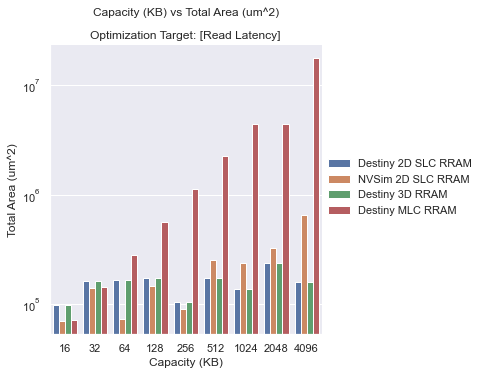

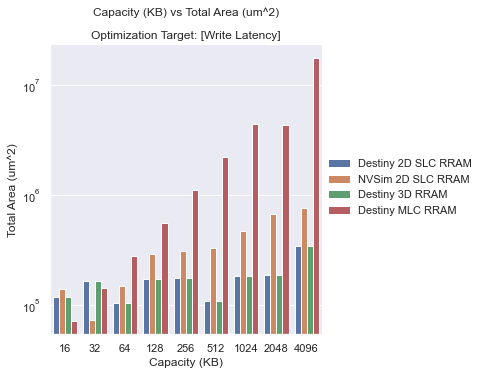

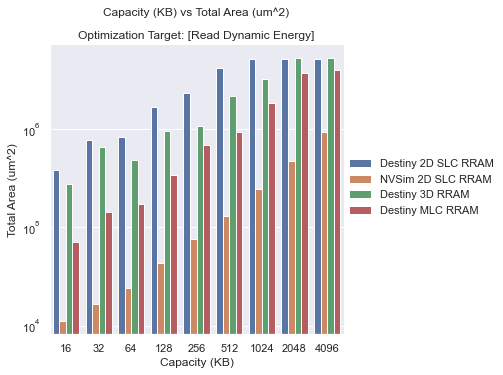

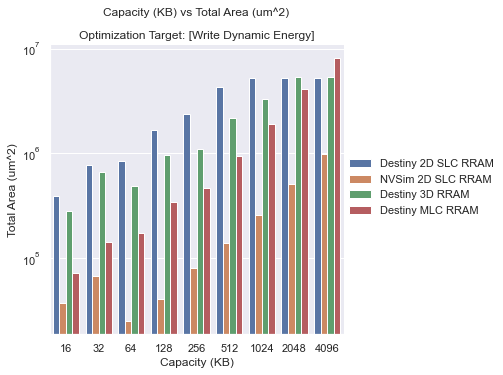

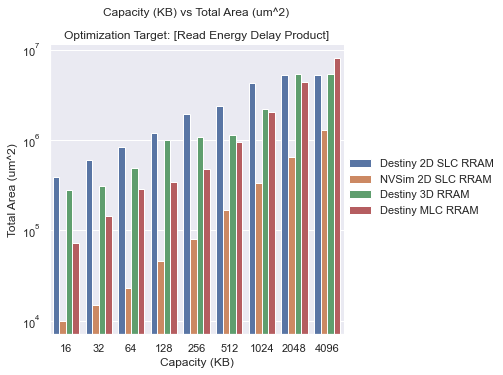

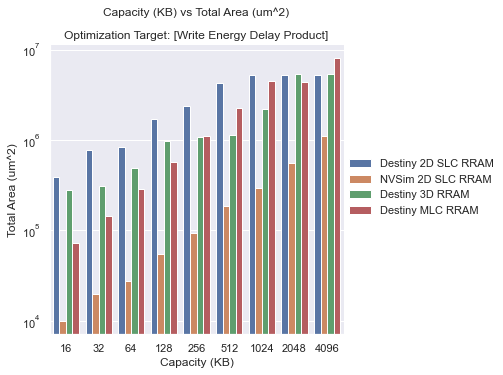

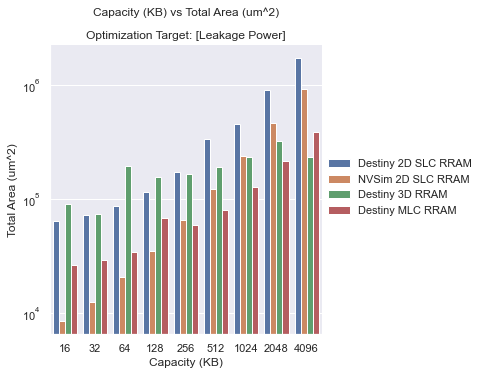

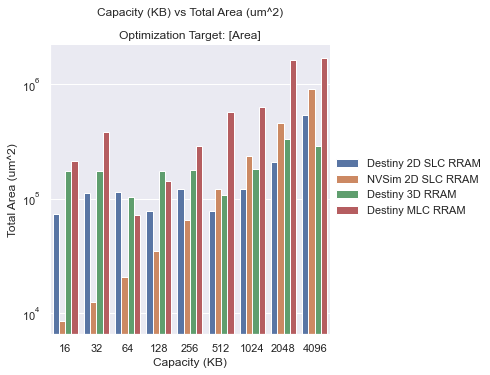

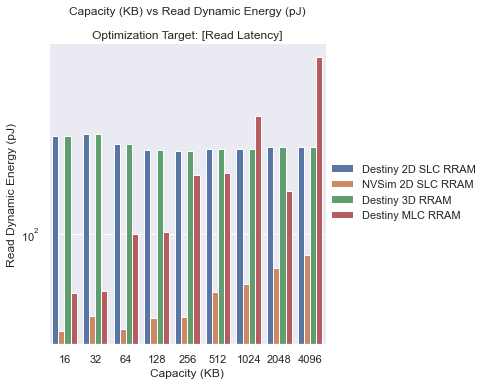

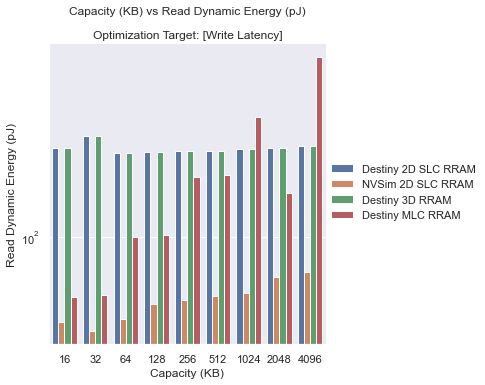

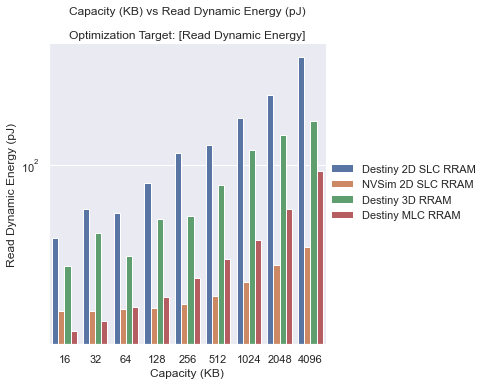

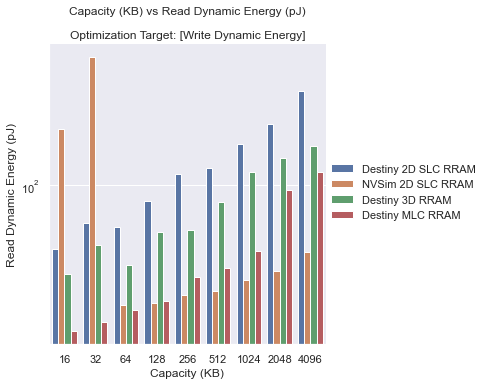

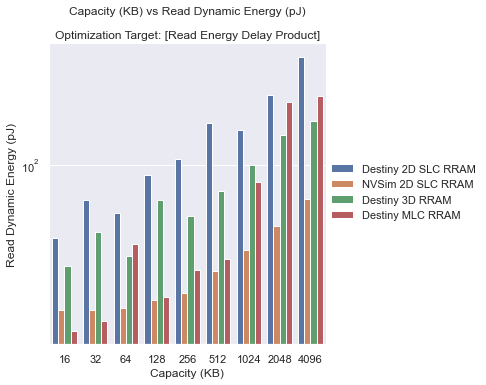

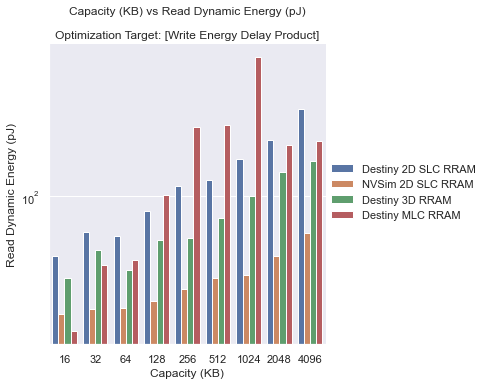

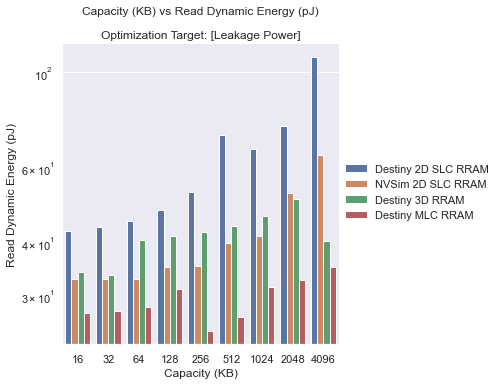

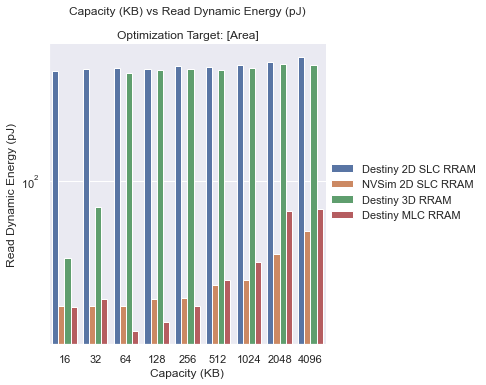

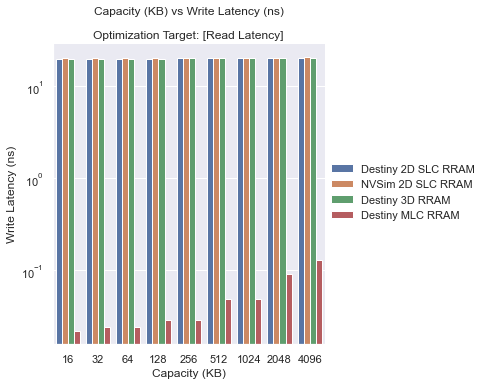

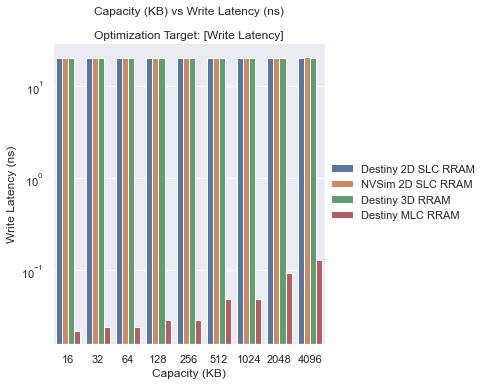

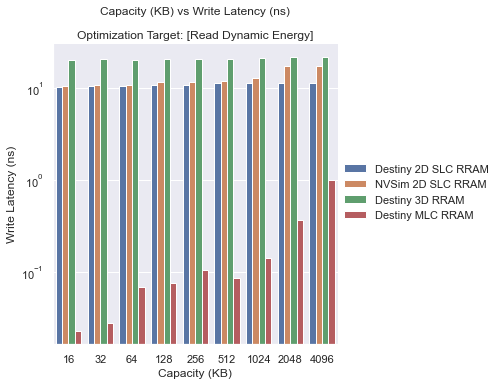

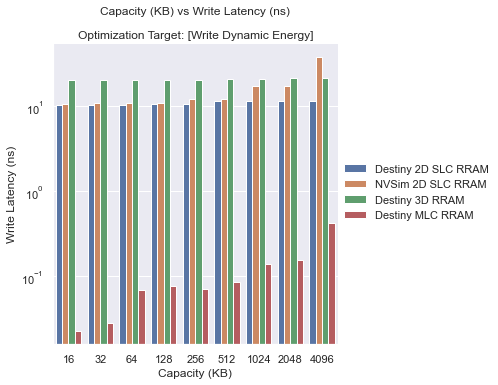

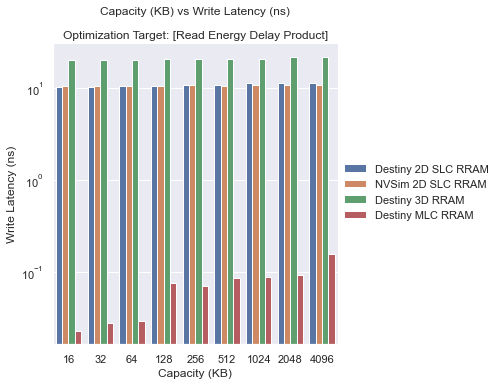

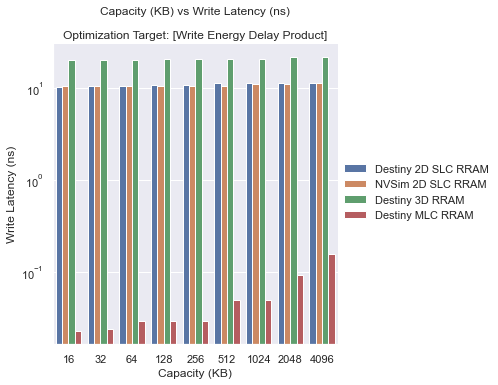

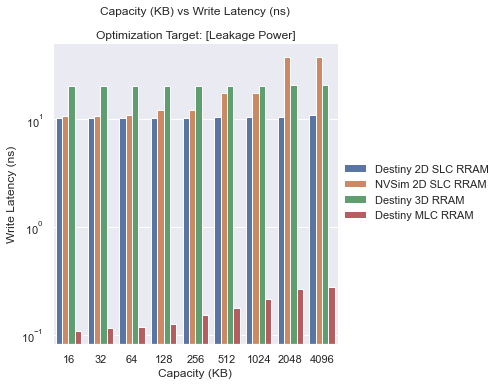

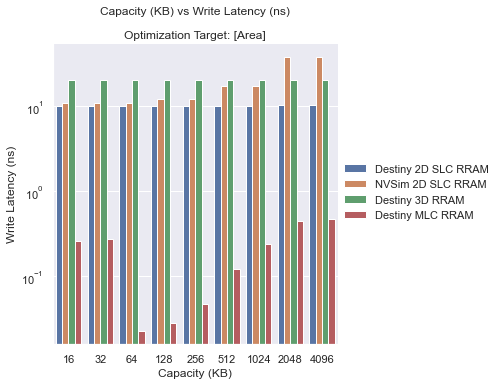

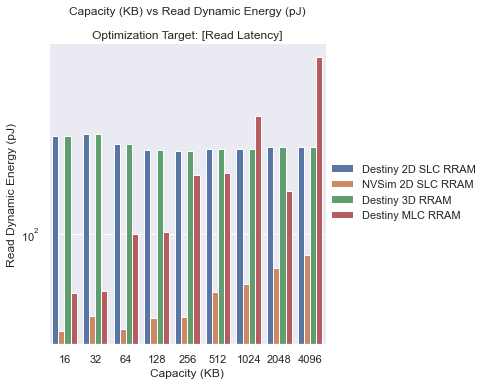

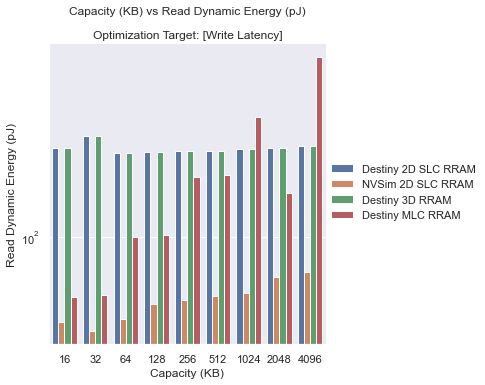

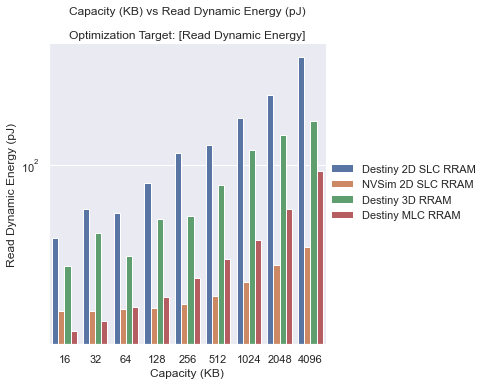

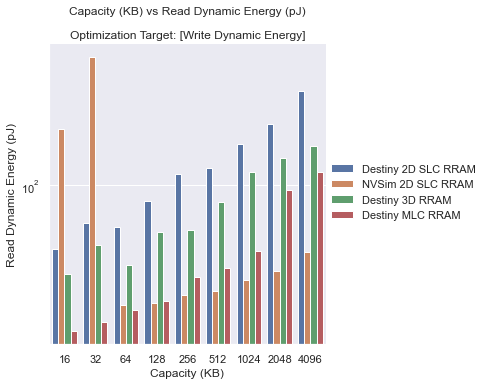

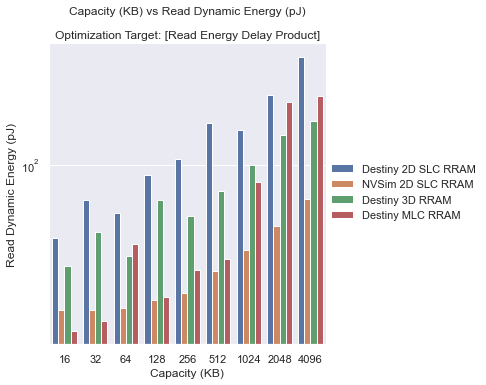

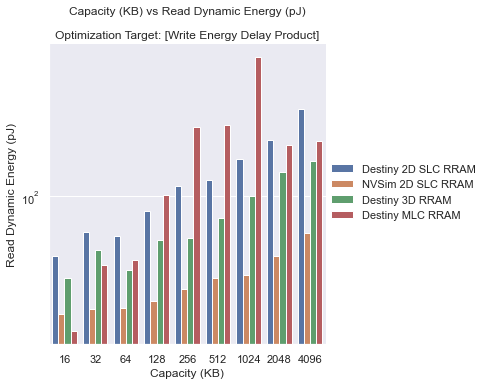

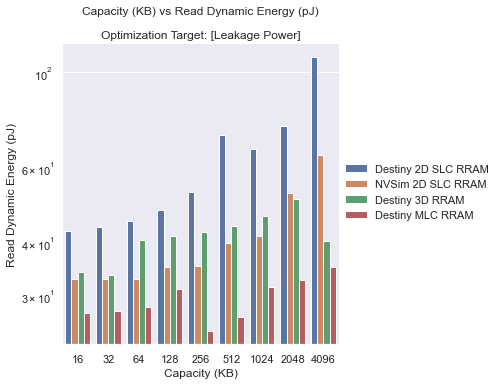

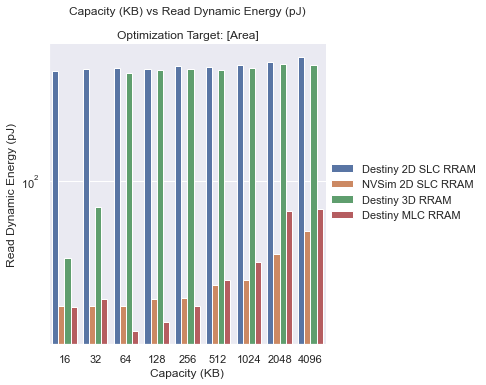

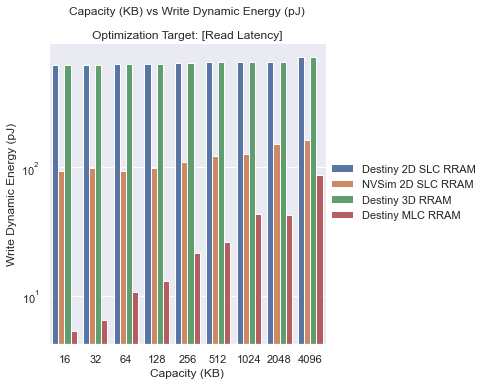

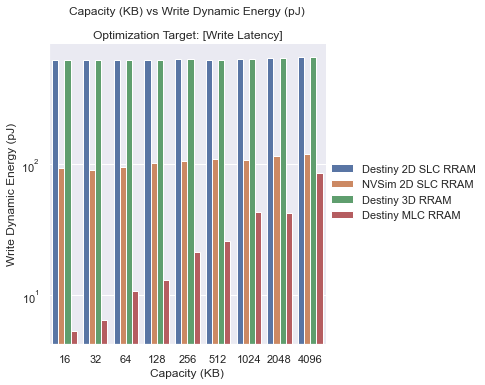

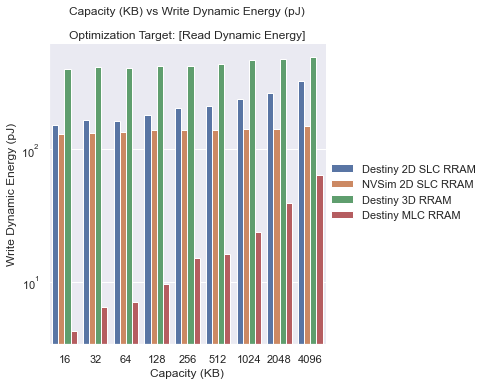

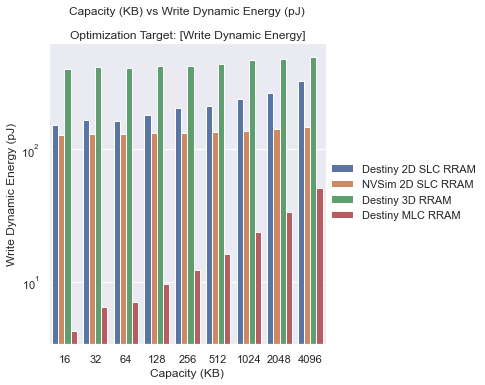

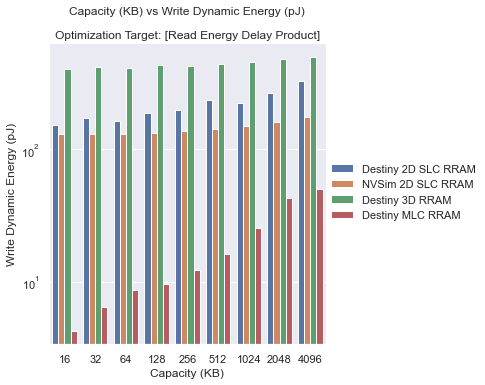

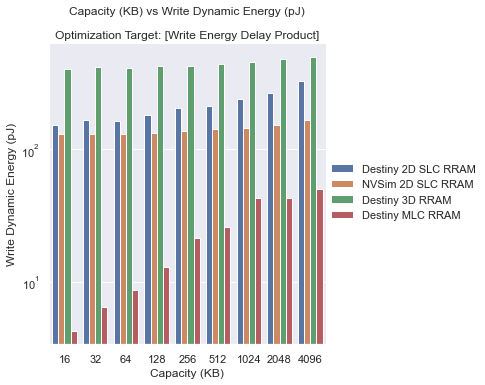

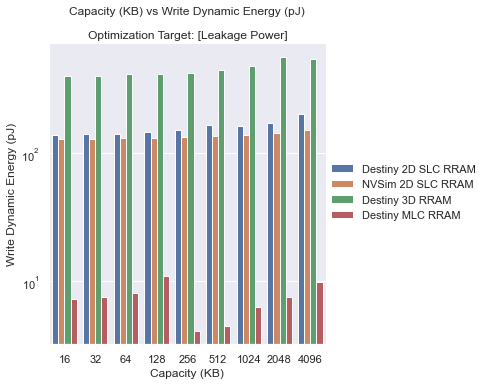

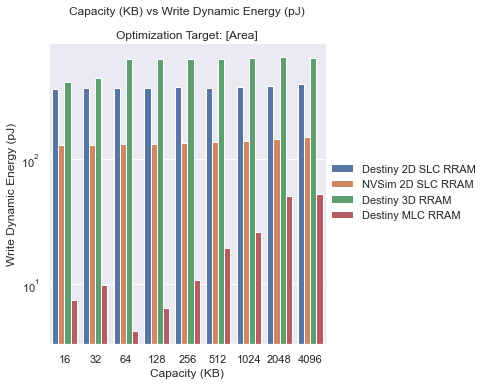

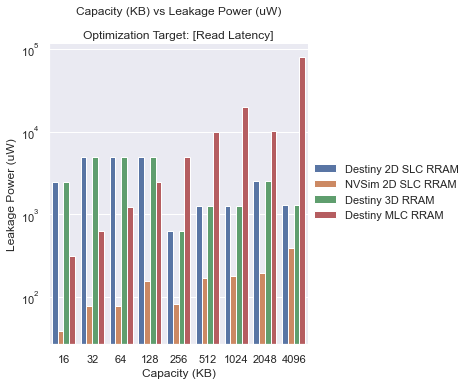

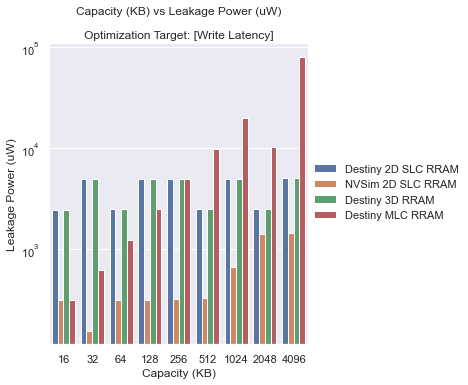

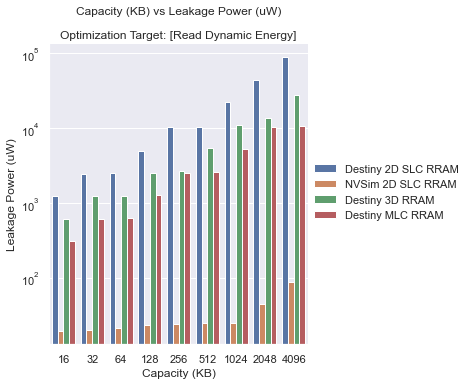

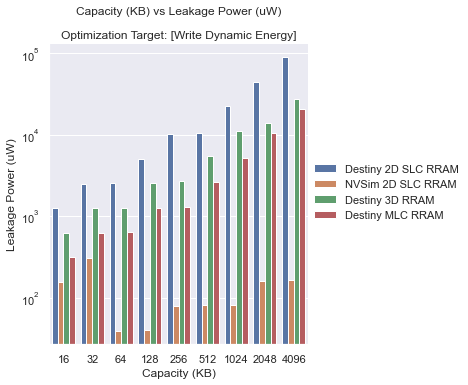

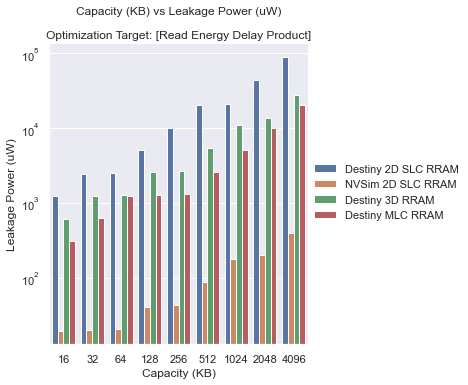

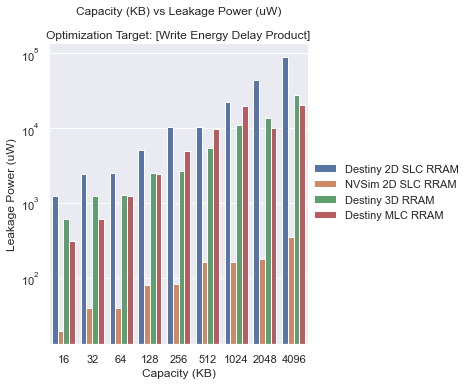

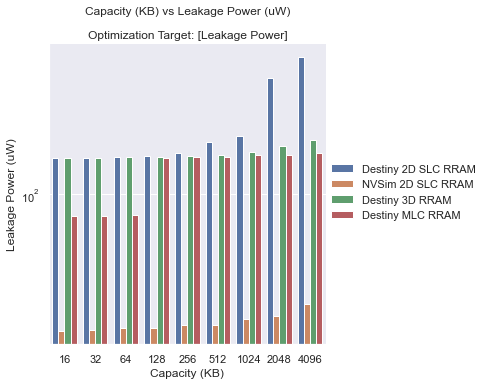

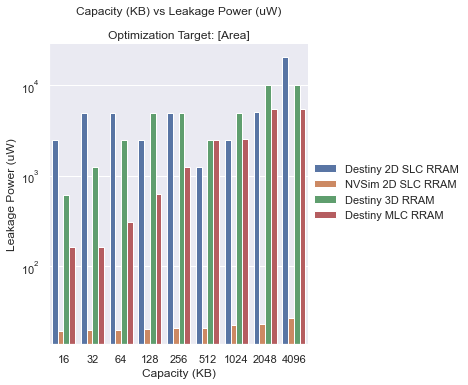

In [309]:
def test_multiplot():
    # Read Latency Optimized - RRAM cells
    xaxis = df_dst_2d.loc[18:26]["Capacity (KB)"]
    df_dst_2d_opt_r_lat_RRAM = df_dst_2d.loc[18:26]["Total Area (um^2)"]  # SLC RRAM
    df_nvs_2d_opt_r_lat_RRAM = df_nvs_2d.loc[18:26]["Total Area (um^2)"]  # SLC RRAM
    df_dst_3d_opt_r_lat = df_dst_hd.loc[0:8]["Total Area (um^2)"]         # 3D  RRAM
    df_dst_mlc_opt_r_lat = df_dst_hd.loc[72:80]["Total Area (um^2)"]      # MLC RRAM
    # drop removes Nan values
    df = pd.concat([xaxis.reset_index(drop=True), df_dst_2d_opt_r_lat_RRAM.reset_index(drop=True), \
                    df_nvs_2d_opt_r_lat_RRAM.reset_index(drop=True), df_dst_3d_opt_r_lat.reset_index(drop=True), \
                    df_dst_mlc_opt_r_lat.reset_index(drop=True)], ignore_index=True, join="outer", axis=1)
    
    df.columns = ["Capacity (KB)", "Destiny 2D SLC RRAM", "NVSim 2D SLC RRAM", "Destiny 3D RRAM", "Destiny MLC RRAM"] # headers    
    
    df = df.reset_index().melt('Capacity (KB)', var_name='Configuration', value_name='vals')
    df = df.iloc[9: , :] # trim off bad index rows

    g = sns.catplot(x="Capacity (KB)", y="vals", hue='Configuration', data=df, kind='bar')
    g.set(title="RRAM Comparison: Opt Target: Read Latency")
    g.set(xlabel = "Capacity (KB)", ylabel = "Total Area (um^2)")
    plt.ticklabel_format(style='plain', axis='y')
    plt.yscale('log')

    
def test_multiplot_1():
    # Read Latency Optimized - RRAM cells
    xaxis = df_dst_2d.loc[54:62]["Capacity (KB)"]
    df_dst_2d_opt_w_lat_RRAM = df_dst_2d.loc[54:62]["Total Area (um^2)"]  # SLC RRAM
    df_nvs_2d_opt_w_lat_RRAM = df_nvs_2d.loc[54:62]["Total Area (um^2)"]  # SLC RRAM
    df_dst_3d_opt_w_lat = df_dst_hd.loc[9:17]["Total Area (um^2)"]         # 3D  RRAM
    df_dst_mlc_opt_w_lat = df_dst_hd.loc[81:89]["Total Area (um^2)"]      # MLC RRAM
    # drop removes Nan values
    df = pd.concat([xaxis.reset_index(drop=True), df_dst_2d_opt_w_lat_RRAM.reset_index(drop=True), \
                    df_nvs_2d_opt_w_lat_RRAM.reset_index(drop=True), df_dst_3d_opt_w_lat.reset_index(drop=True), \
                    df_dst_mlc_opt_w_lat.reset_index(drop=True)], ignore_index=True, join="outer", axis=1)
    
    df.columns = ["Capacity (KB)", "Destiny 2D SLC RRAM", "NVSim 2D SLC RRAM", "Destiny 3D RRAM", "Destiny MLC RRAM"] # headers    
    
    df = df.reset_index().melt('Capacity (KB)', var_name='Configuration', value_name='vals')
    df = df.iloc[9: , :] # trim off bad index rows

    g = sns.catplot(x="Capacity (KB)", y="vals", hue='Configuration', data=df, kind='bar')
    g.set(title="RRAM Comparison: Opt Target: Write Latency")
    g.set(xlabel = "Capacity (KB)", ylabel = "Total Area (um^2)")
    plt.ticklabel_format(style='plain', axis='y')
    plt.yscale('log')

    

def test_multiplot_general(opt_target, indices, xname, yname):
    # Read Latency Optimized - RRAM cells
    xaxis = df_dst_2d.loc[indices[0]:indices[0]+8][xname]
    df0 = df_dst_2d.loc[indices[0]:indices[0]+8][yname]  # SLC RRAM
    df1 = df_nvs_2d.loc[indices[0]:indices[0]+8][yname]  # SLC RRAM
    df2 = df_dst_hd.loc[indices[1]:indices[1]+8][yname]  # 3D  RRAM
    df3 = df_dst_hd.loc[indices[2]:indices[2]+8][yname]  # MLC RRAM
    # drop removes Nan values
    df = pd.concat([xaxis.reset_index(drop=True), df0.reset_index(drop=True), df1.reset_index(drop=True), \
                    df2.reset_index(drop=True), df3.reset_index(drop=True)], ignore_index=True, join="outer", axis=1)
    
    df.columns = ["Capacity (KB)", "Destiny 2D SLC RRAM", "NVSim 2D SLC RRAM", "Destiny 3D RRAM", "Destiny MLC RRAM"] # headers    
    
    df = df.reset_index().melt(f'{xname}', var_name='', value_name='vals')
    df = df.iloc[9: , :] # trim off bad index rows

    g = sns.catplot(x=f'{xname}', y="vals", hue='', data=df, kind='bar')
    g.set(title=f'{xname} vs {yname}\n\nOptimization Target: [{opt_target}]')
    g.set(xlabel = f'{xname}', ylabel = f'{yname}')
    plt.ticklabel_format(style='plain', axis='y')
    
    # plt.legend(loc='upper left')
    plt.yscale('log')
    # plt.tight_layout()
    

# 0:8, 9:17, 18:26, 27:35;  36:44, 45:53, 54:62, 63:71
opt_targets = { 'Read Latency' :               [18, 0, 72],
                'Write Latency' :              [54, 9, 81],
                'Read Dynamic Energy' :        [72, 18, 90],
                'Write Dynamic Energy' :       [108, 27, 99],
                'Read Energy Delay Product' :  [144, 36, 108],
                'Write Energy Delay Product' : [180, 45, 117],
                'Leakage Power' :              [216, 54, 126],
                'Area' :                       [252, 63, 133] }


# define subplot grid
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 12))
# plt.subplots_adjust(hspace=0.5)
# fig.suptitle("RRAM Cell Comparisons", fontsize=18, y=0.95)

# Read Bandwidth (GB/s) and Write Bandwidth (GB/s) not recorded for MLC RRAM, so excluding from comparisons
for result in ['Total Area (um^2)', 'Read Dynamic Energy (pJ)', 'Write Latency (ns)', 'Read Dynamic Energy (pJ)', 'Write Dynamic Energy (pJ)', 'Leakage Power (uW)']:
    for opt_target, indices in opt_targets.items():
        test_multiplot_general(opt_target, indices, xname="Capacity (KB)", yname=result)
 

In [ ]:
# DESTINY HD

# destiny High Density with 8 optimizations
# [0:71] =   3D_RRAM
# [72:143] = MLC_RRAM

# 3D
df_dst_3d_opt_r_lat = df_dst_hd.loc[0:8]
df_dst_3d_opt_w_lat = df_dst_hd.loc[9:17]
df_dst_3d_opt_rde =   df_dst_hd.loc[18:26]
df_dst_3d_opt_wde =   df_dst_hd.loc[27:35]
df_dst_3d_opt_r_edp = df_dst_hd.loc[36:44]
df_dst_3d_opt_w_edp = df_dst_hd.loc[45:53]
df_dst_3d_opt_l_pow = df_dst_hd.loc[54:62]
df_dst_3d_opt_area =  df_dst_hd.loc[63:71]


# MLC
df_dst_mlc_opt_r_lat = df_dst_hd.loc[72:80]
df_dst_mlc_opt_w_lat = df_dst_hd.loc[81:89]
df_dst_mlc_opt_rde =   df_dst_hd.loc[90:98]
df_dst_mlc_opt_wde =   df_dst_hd.loc[99:107]
df_dst_mlc_opt_r_edp = df_dst_hd.loc[108:116]
df_dst_mlc_opt_w_edp = df_dst_hd.loc[117:125]
df_dst_mlc_opt_l_pow = df_dst_hd.loc[126:134]
df_dst_mlc_opt_area =  df_dst_hd.loc[135:143]


In [22]:
# expects 36 row dataframe
def plot_2x4_boxplot(dataframe, xaxis, yaxis0, yaxis1, yaxis2, yaxis3, yaxis4, yaxis5, yaxis6, yaxis7, title, cell_type=None):
    if cell_type   == 'STTRAM':  dataframe = dataframe.loc[0:8]
    elif cell_type ==   'SRAM':  dataframe = dataframe.loc[9:17]
    elif cell_type ==   'RRAM':  dataframe = dataframe.loc[18:26]
    elif cell_type ==  'PCRAM':  dataframe = dataframe.loc[27:35]
    
    if cell_type is not None: title = f'{cell_type}: {title}'
    
    fig, axes = plt.subplots(2, 4, figsize=(24, 18))
    fig.suptitle(f'{title}')

    sns.boxplot(ax=axes[0, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis0}')
    sns.boxplot(ax=axes[1, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis1}')
    sns.boxplot(ax=axes[0, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis2}')
    sns.boxplot(ax=axes[1, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis3}')    
    sns.boxplot(ax=axes[0, 2], data=dataframe, x=f'{xaxis}', y=f'{yaxis4}')
    sns.boxplot(ax=axes[1, 2], data=dataframe, x=f'{xaxis}', y=f'{yaxis5}')
    sns.boxplot(ax=axes[0, 3], data=dataframe, x=f'{xaxis}', y=f'{yaxis6}')
    sns.boxplot(ax=axes[1, 3], data=dataframe, x=f'{xaxis}', y=f'{yaxis7}')
        

SystemExit: 

/opt/homebrew/Cellar/jupyterlab/3.2.5/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


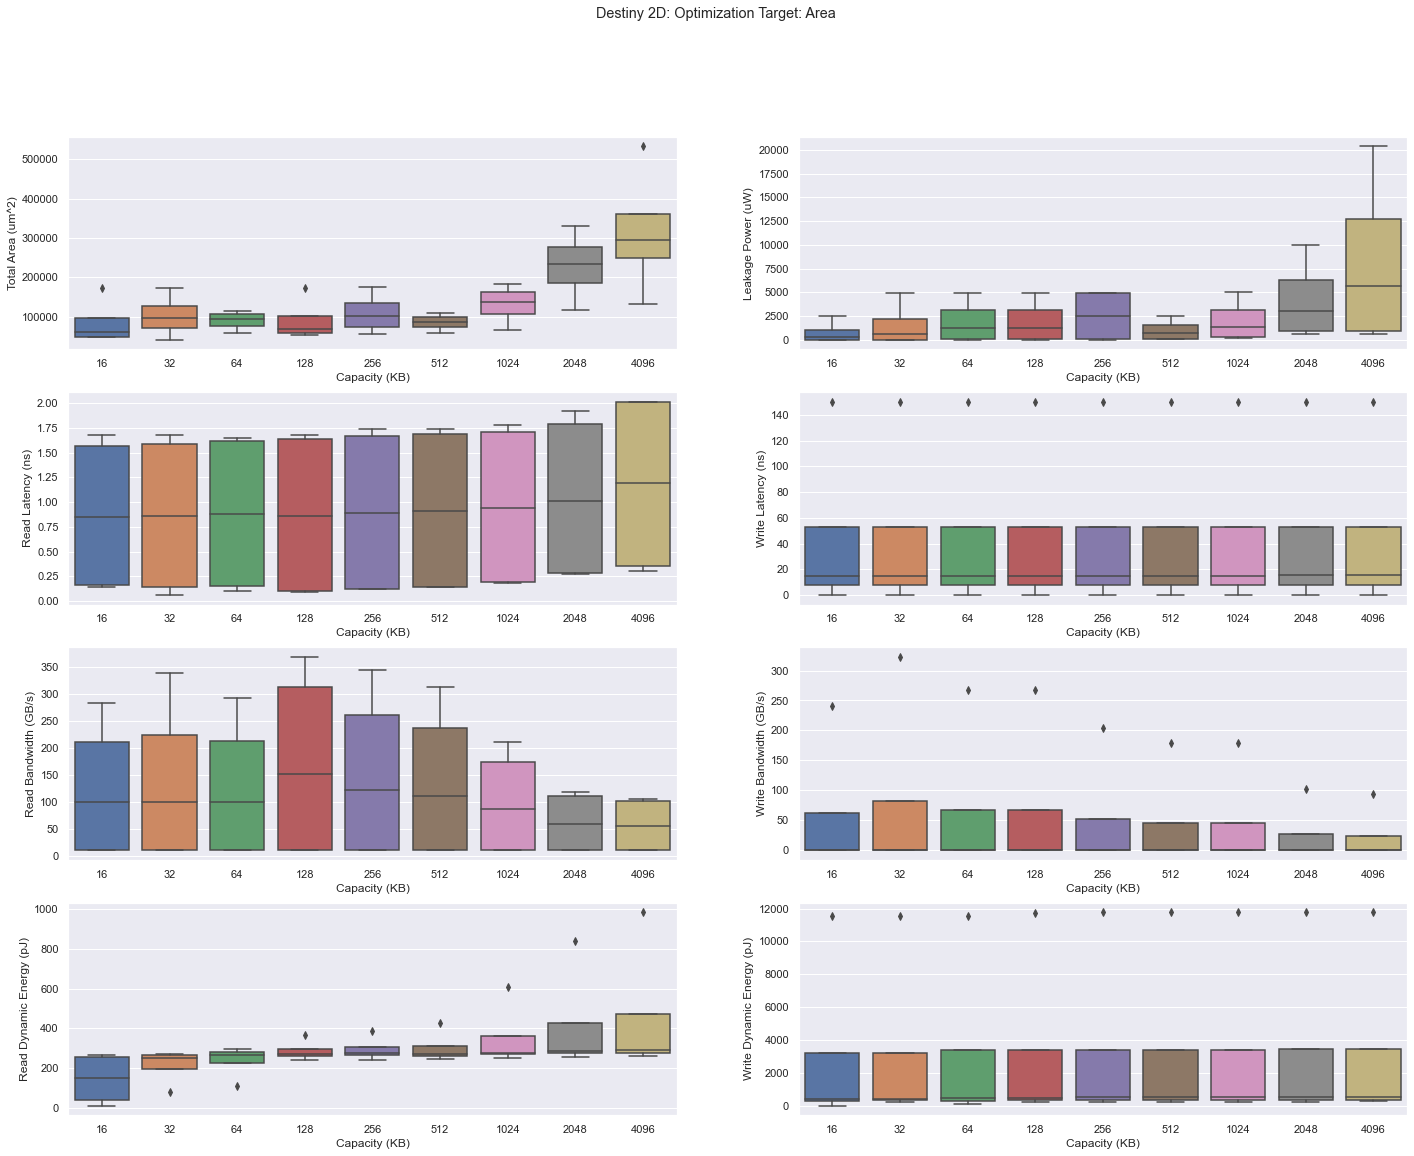

In [29]:
# DESTINY 2D

# destiny 2D with 8 Optimization Targets
df_dst_2d_opt_r_lat = df_dst_2d.loc[0:35]
df_dst_2d_opt_w_lat = df_dst_2d.loc[36:71]
df_dst_2d_opt_rde =   df_dst_2d.loc[72:107]
df_dst_2d_opt_wde =   df_dst_2d.loc[108:143]
df_dst_2d_opt_r_edp = df_dst_2d.loc[144:179]
df_dst_2d_opt_w_edp = df_dst_2d.loc[180:215]
df_dst_2d_opt_l_pow = df_dst_2d.loc[216:251]
df_dst_2d_opt_area =  df_dst_2d.loc[252:287]

opt_targets = { 'Destiny 2D: Optimization Target: Area'                       : df_dst_2d_opt_area,
                'Destiny 2D: Optimization Target: Leakage Power'              : df_dst_2d_opt_l_pow, 
                'Destiny 2D: Optimization Target: Read Latency'               : df_dst_2d_opt_r_lat,
                'Destiny 2D: Optimization Target: Write Latency'              : df_dst_2d_opt_w_lat, 
                'Destiny 2D: Optimization Target: Read Dynamic Energy'        : df_dst_2d_opt_rde, 
                'Destiny 2D: Optimization Target: Write Dynamic Energy'       : df_dst_2d_opt_wde, 
                'Destiny 2D: Optimization Target: Read Energy Delay Product'  : df_dst_2d_opt_r_edp, 
                'Destiny 2D: Optimization Target: Write Energy Delay Product' : df_dst_2d_opt_w_edp, }

# create 8 plots for each result metric, for each optimization target
for opt_type, df in opt_targets.items():
    save_fig = (opt_type.split(':')[0] + opt_type.split(':')[2] + '.png').replace(' ','_')
    plot_4x2_boxplot(df, 'Capacity (KB)', opt_type, savefile=save_fig)
    sys.exit()

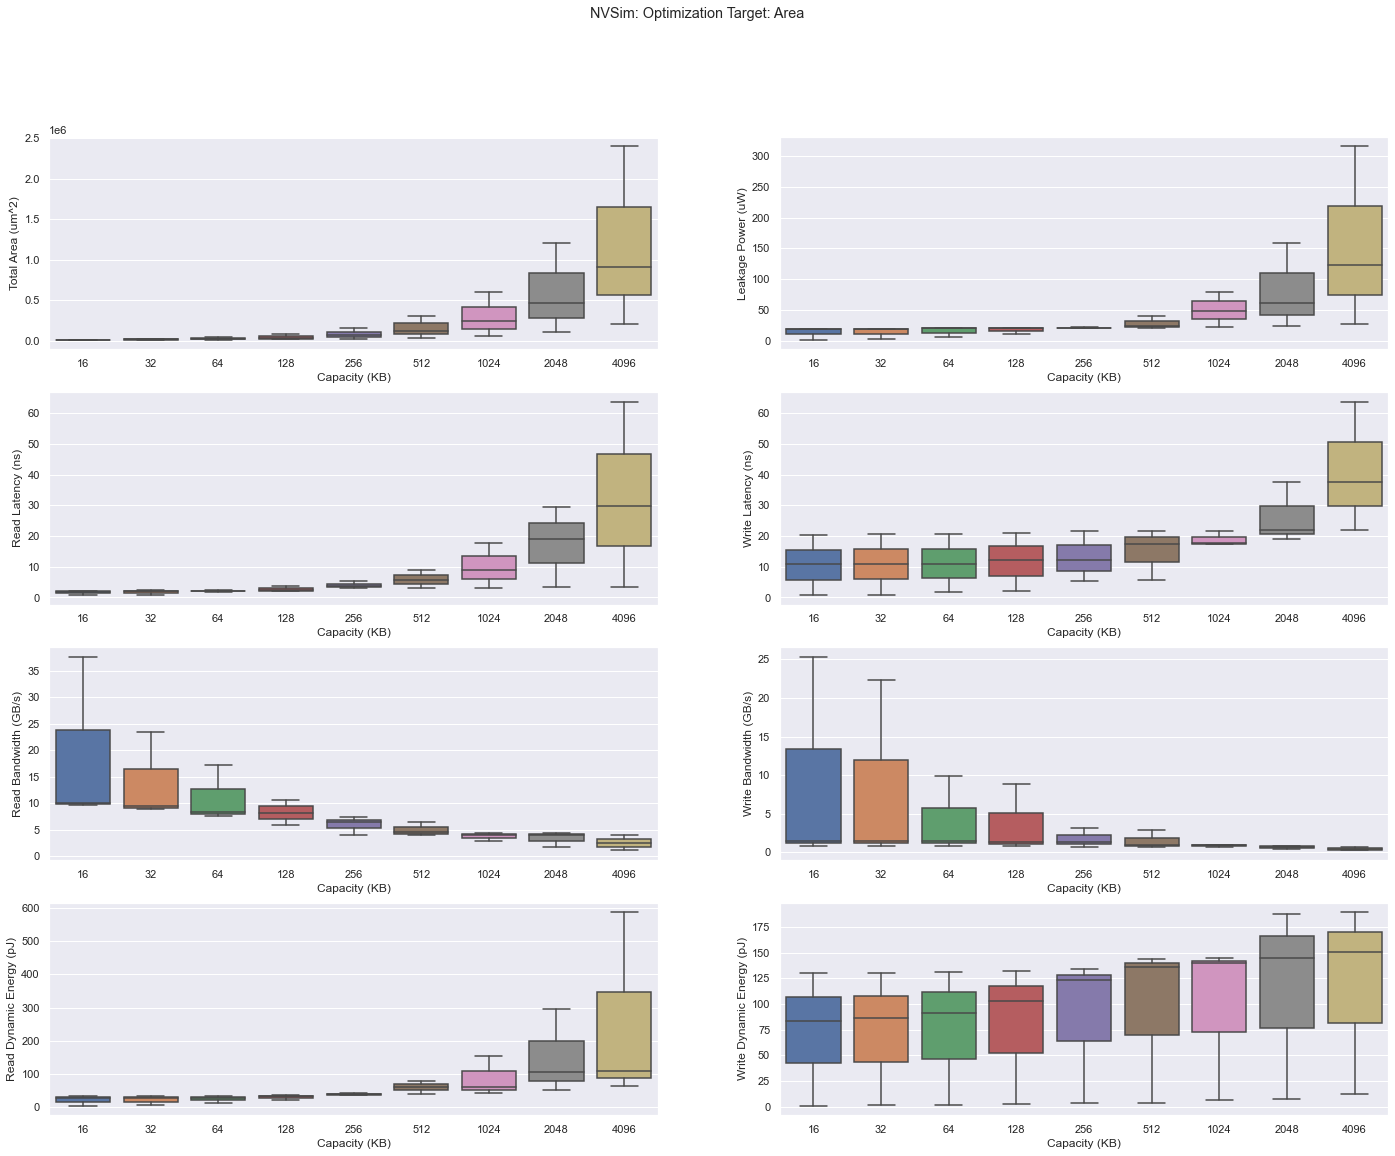

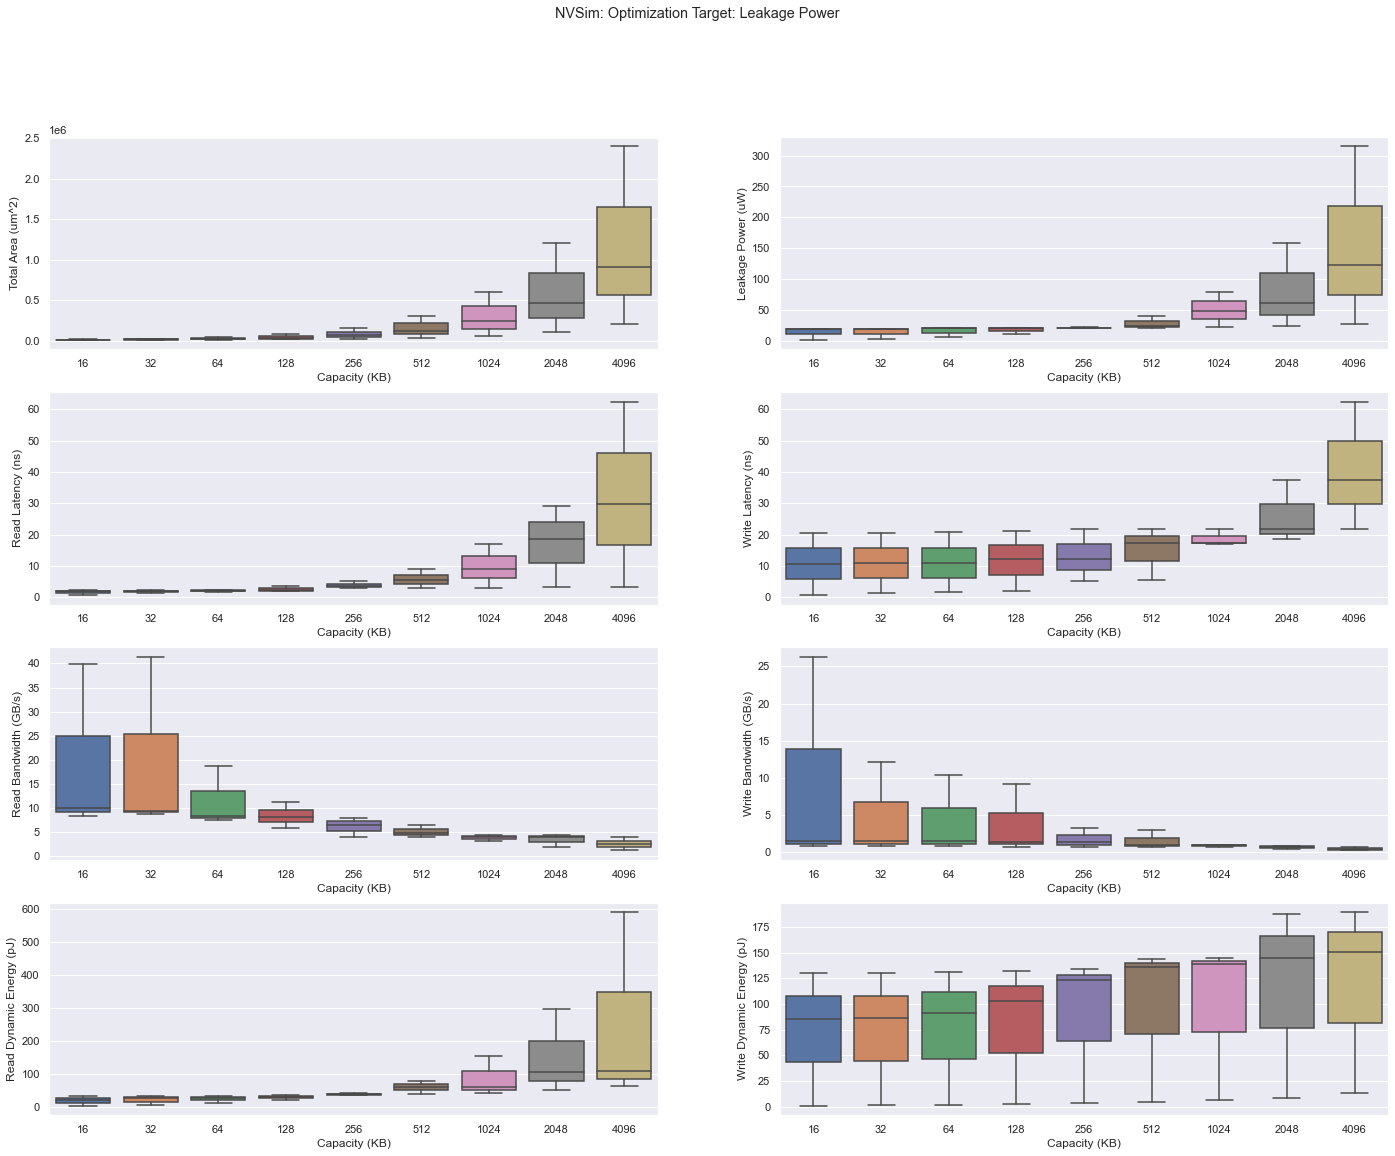

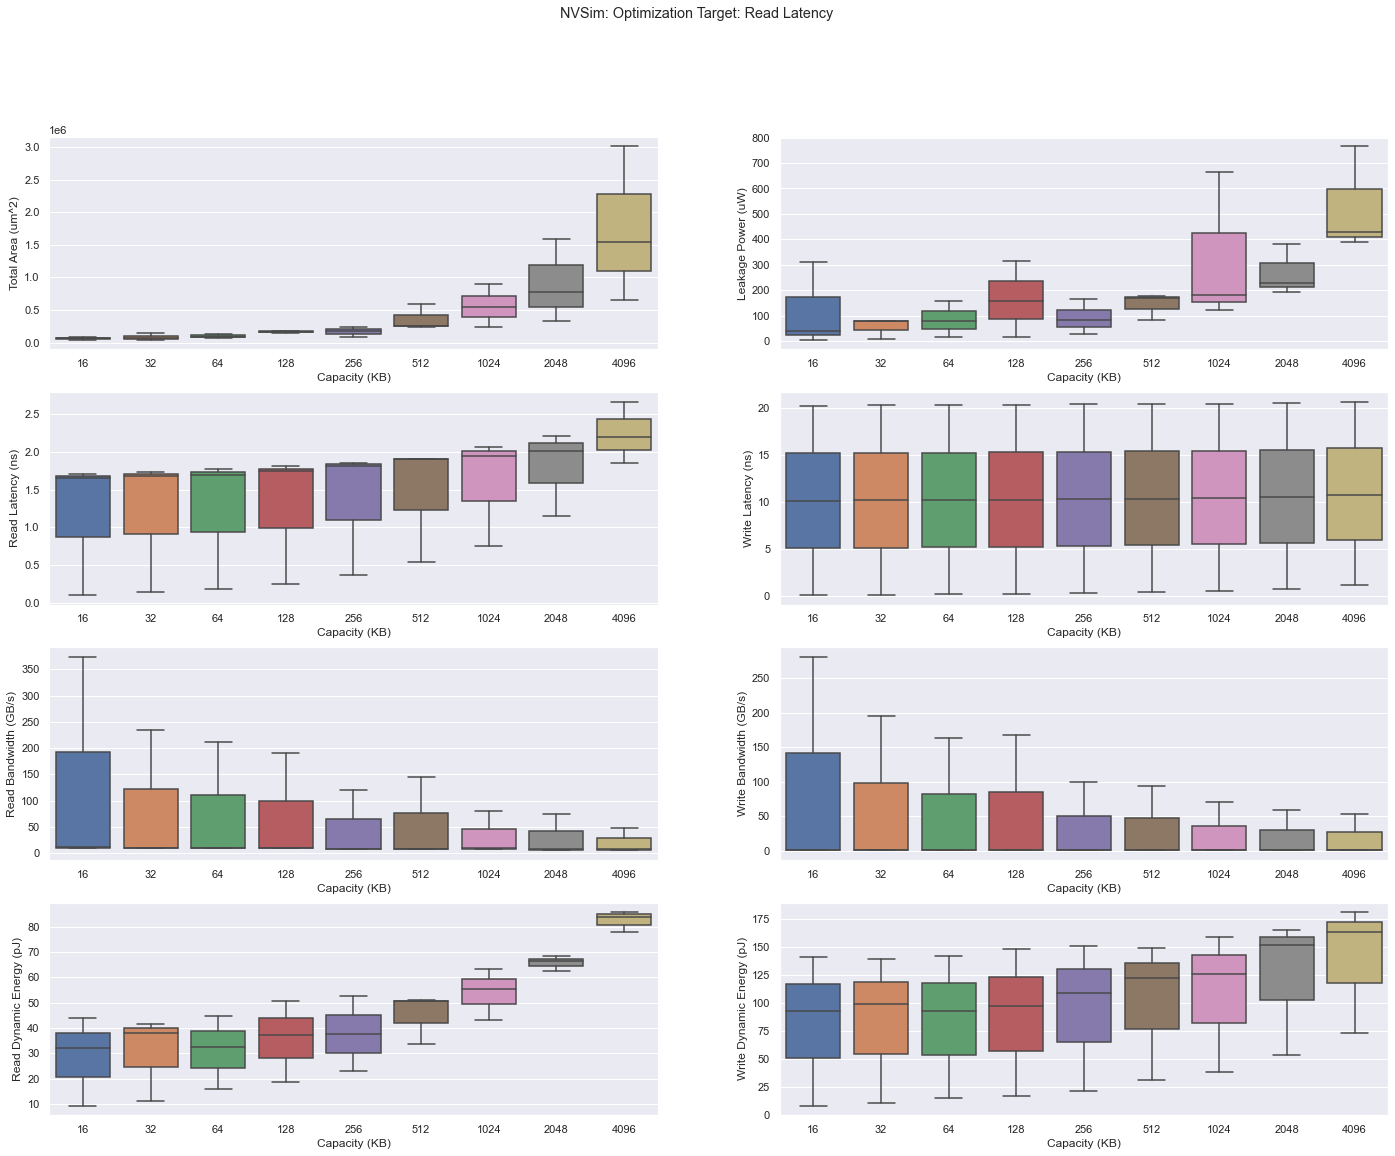

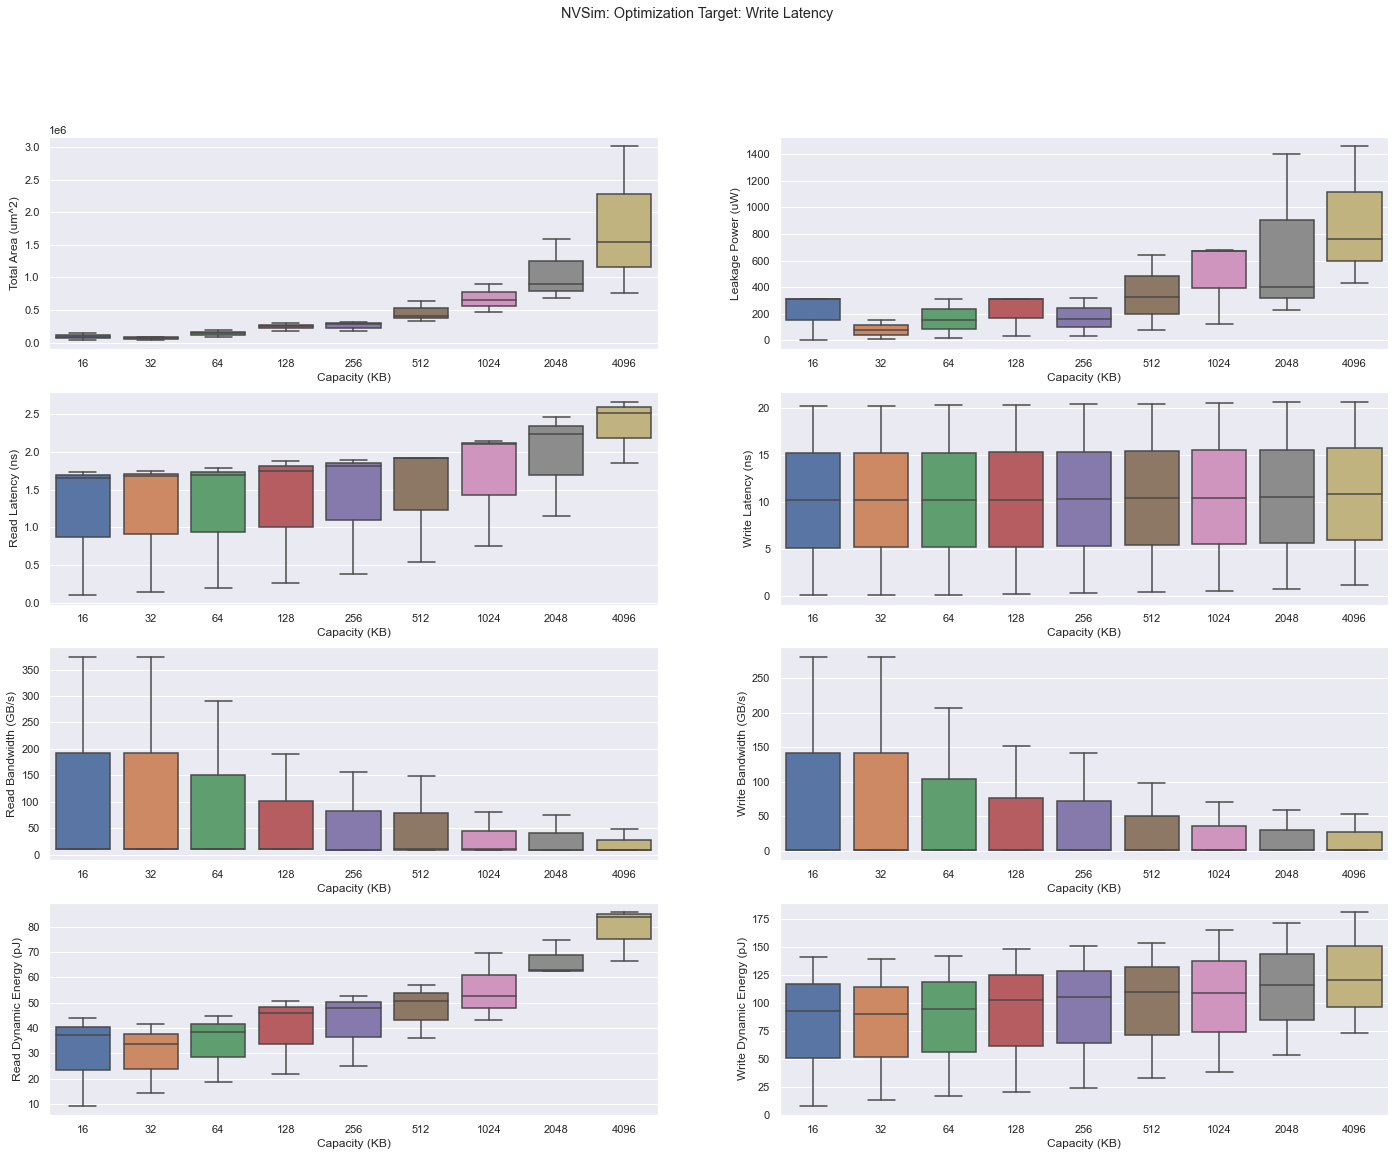

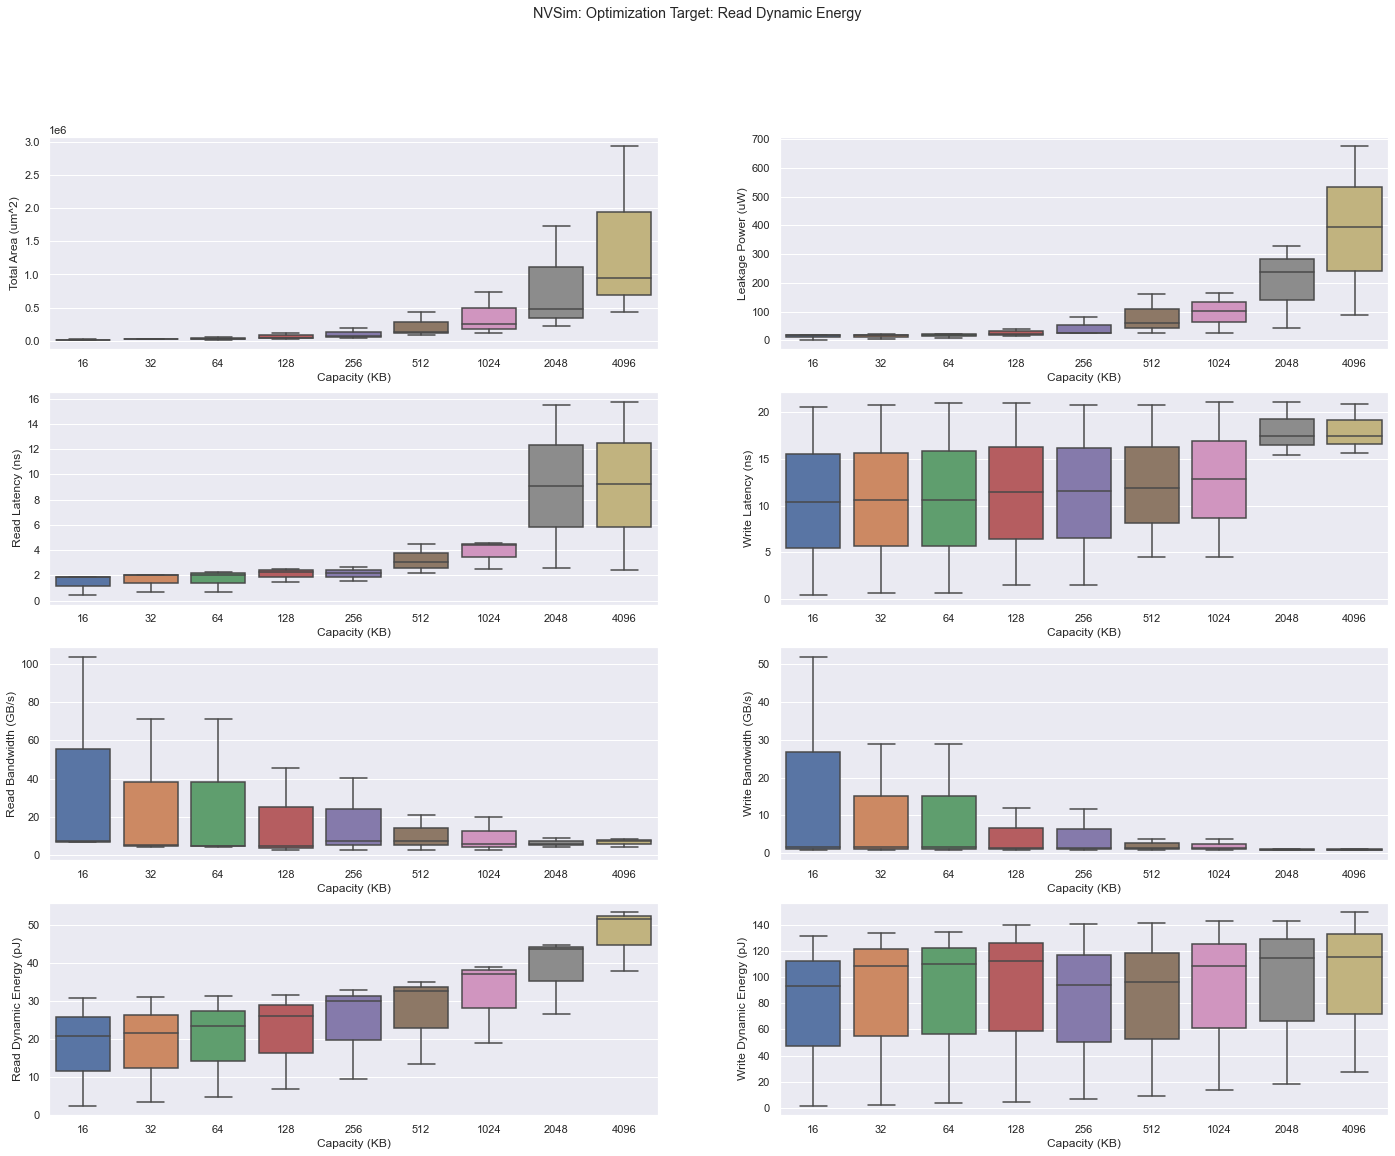

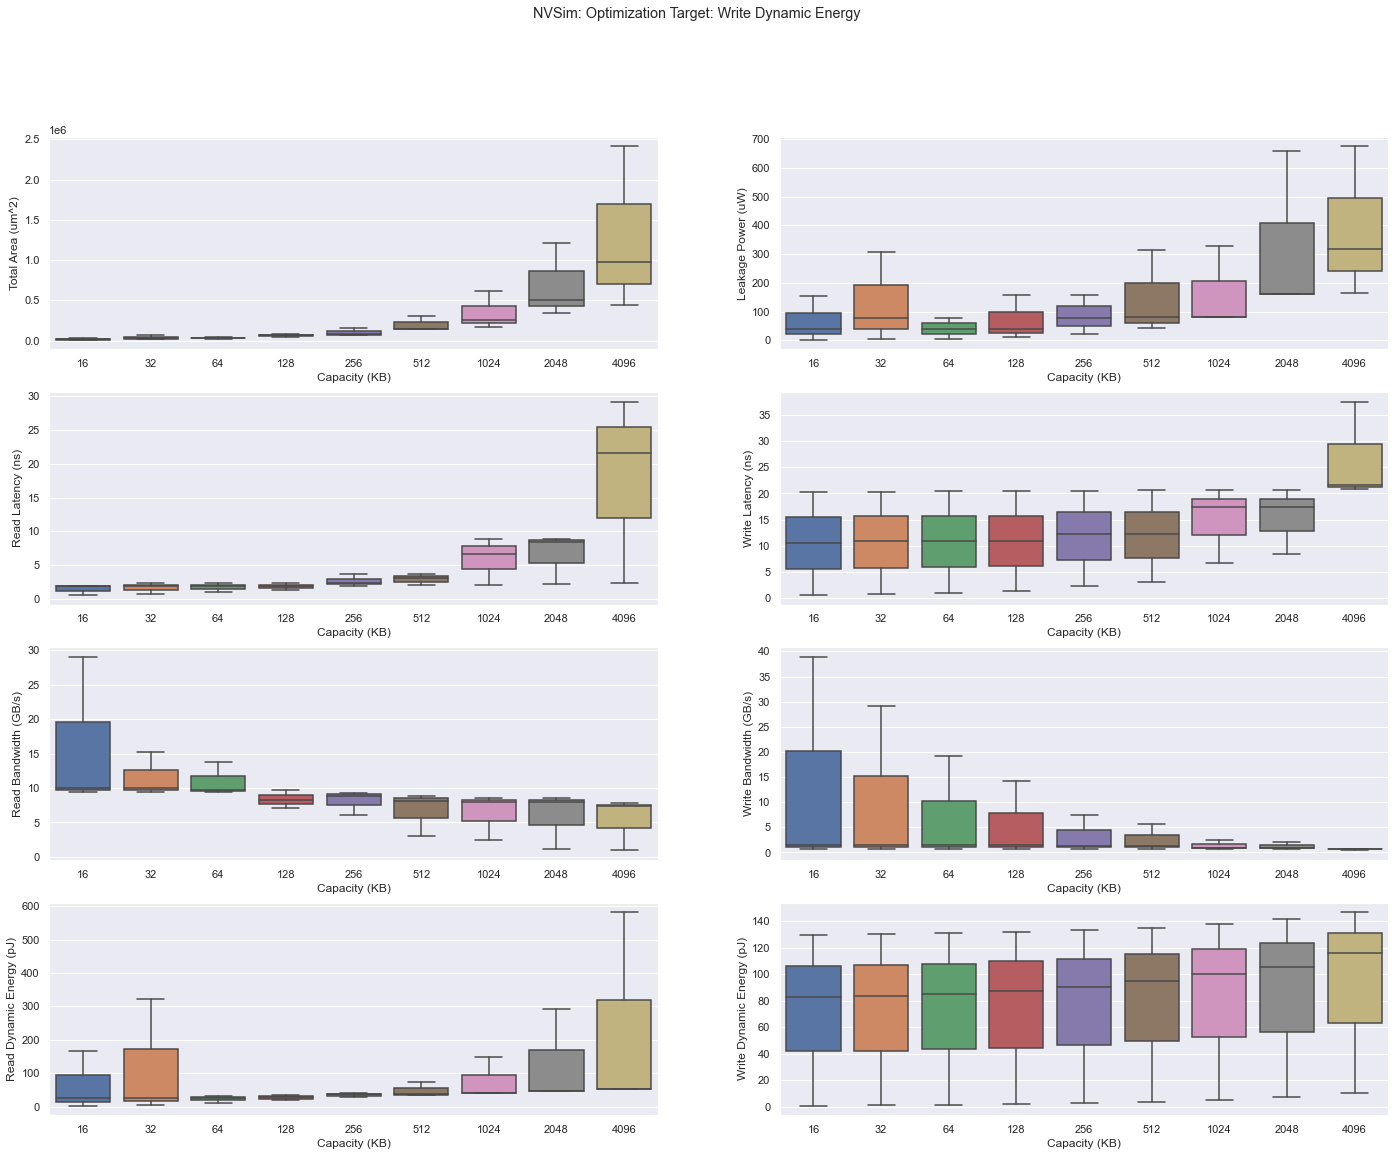

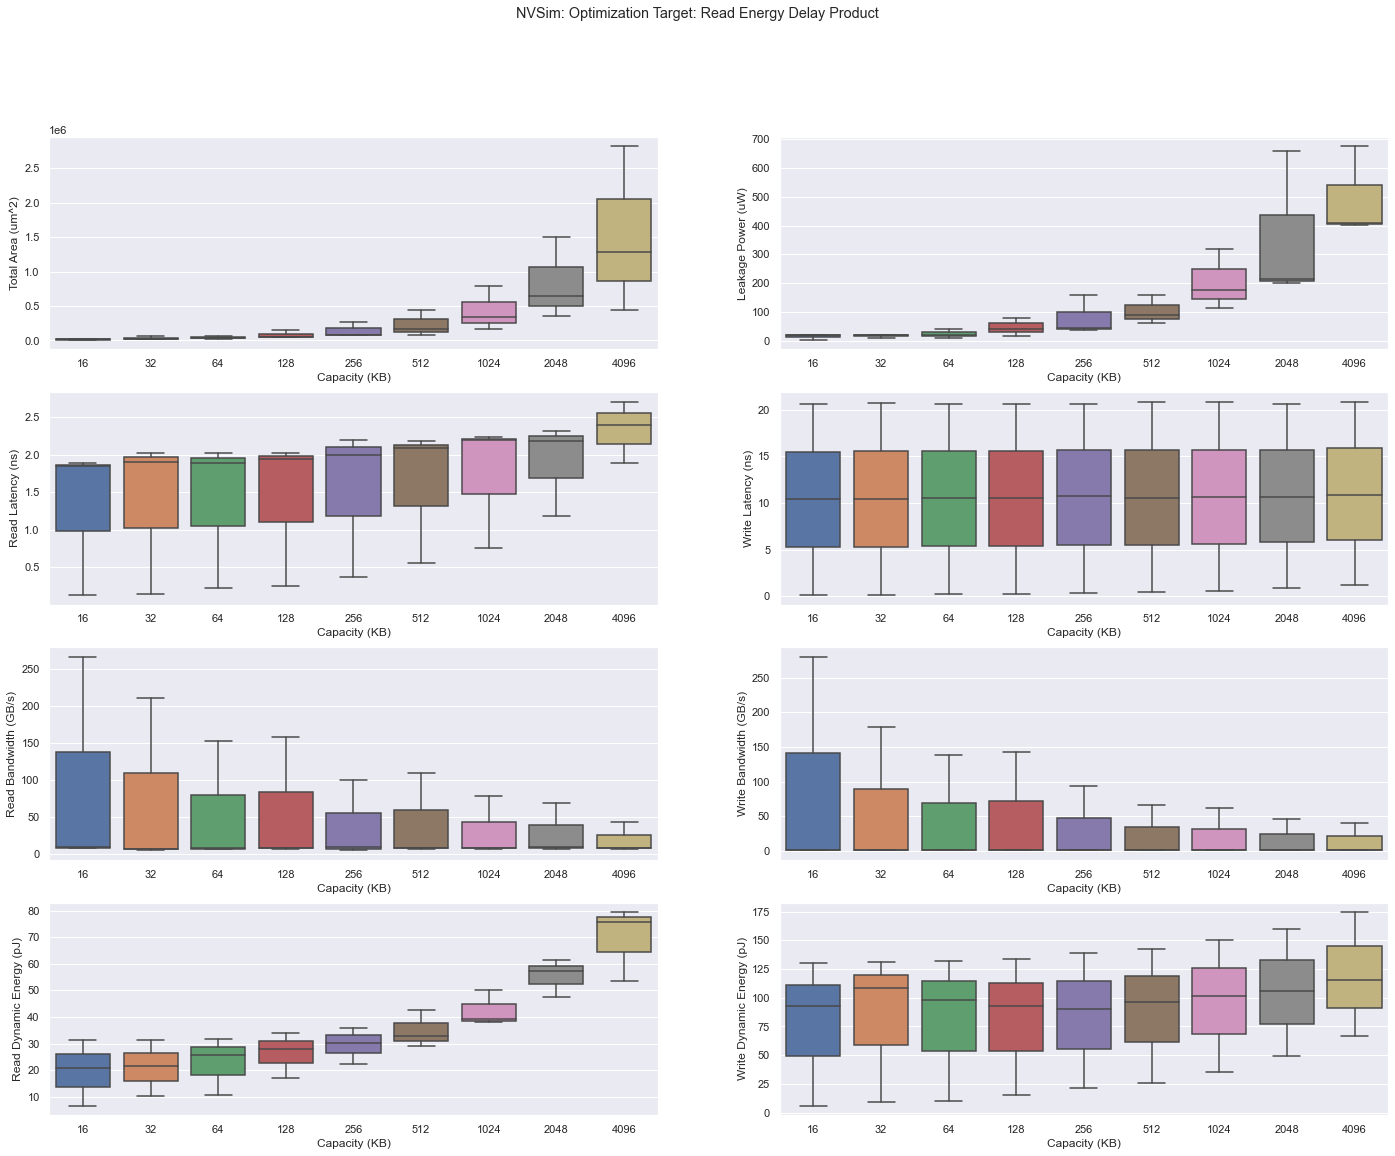

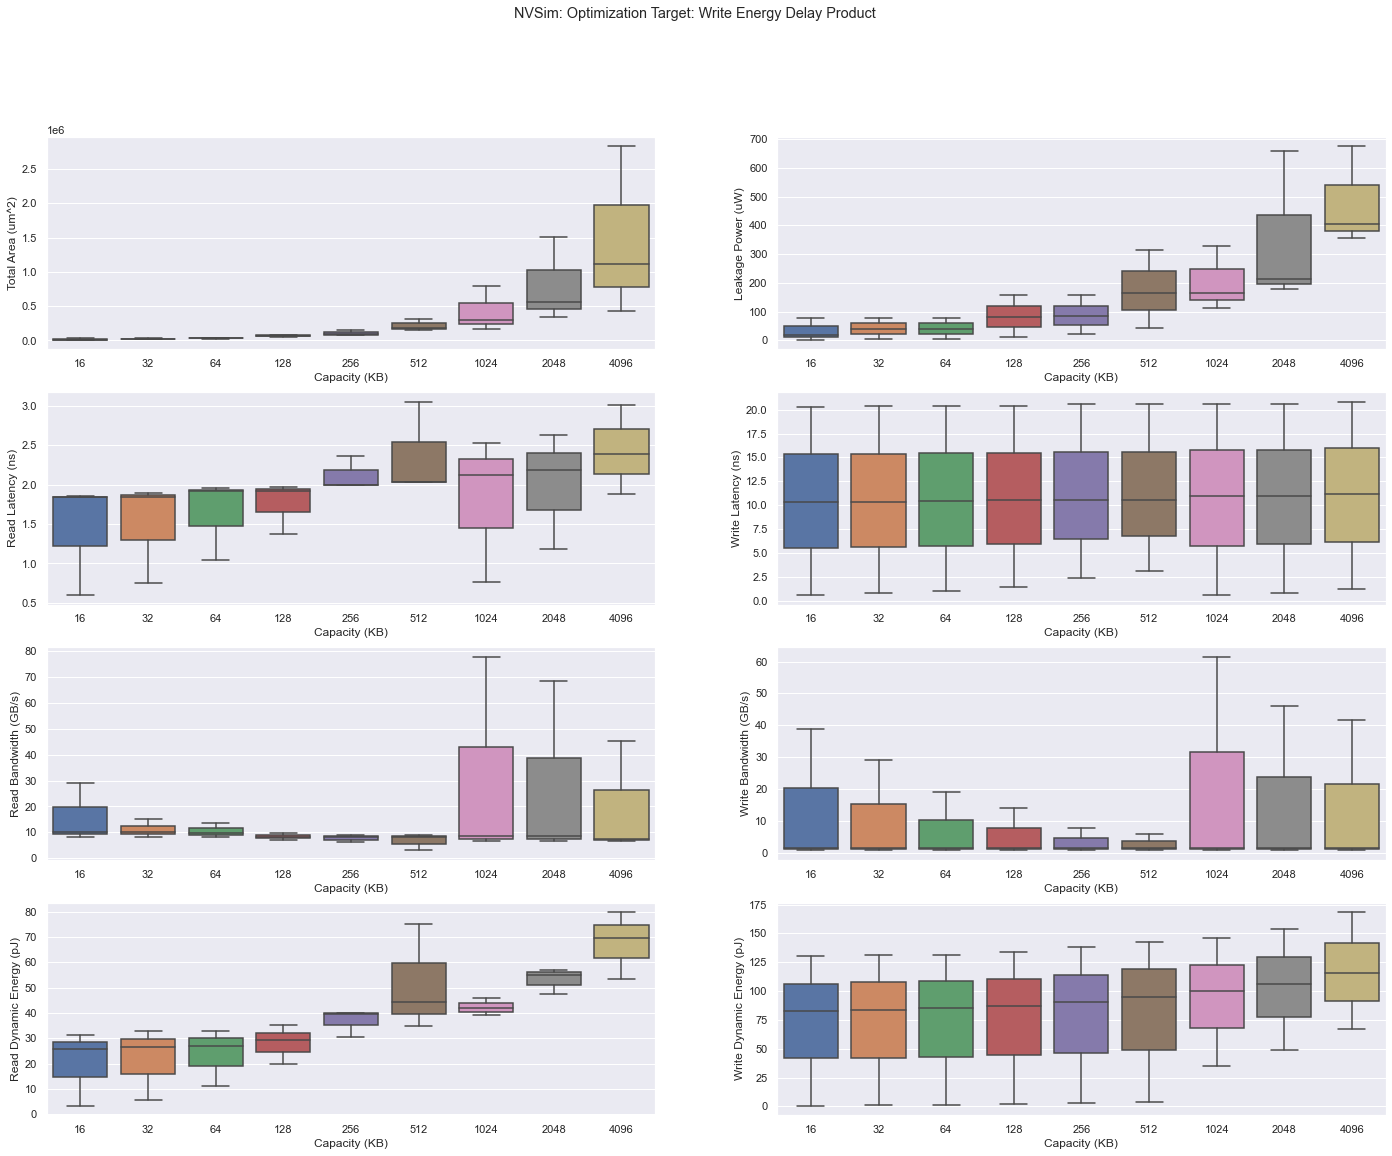

In [124]:
# NVSIM 2D

# nvsim 2D with 8 Optimization Targets
df_nvs_opt_r_lat = df_nvs_2d.loc[0:35]
df_nvs_opt_w_lat = df_nvs_2d.loc[36:71]
df_nvs_opt_rde =   df_nvs_2d.loc[72:107]
df_nvs_opt_wde =   df_nvs_2d.loc[108:143]
df_nvs_opt_r_edp = df_nvs_2d.loc[144:179]
df_nvs_opt_w_edp = df_nvs_2d.loc[180:215]
df_nvs_opt_l_pow = df_nvs_2d.loc[216:251]
df_nvs_opt_area =  df_nvs_2d.loc[252:287]

opt_targets = { 'NVSim: Optimization Target: Area'                       : df_nvs_opt_area,
                'NVSim: Optimization Target: Leakage Power'              : df_nvs_opt_l_pow, 
                'NVSim: Optimization Target: Read Latency'               : df_nvs_opt_r_lat,
                'NVSim: Optimization Target: Write Latency'              : df_nvs_opt_w_lat, 
                'NVSim: Optimization Target: Read Dynamic Energy'        : df_nvs_opt_rde, 
                'NVSim: Optimization Target: Write Dynamic Energy'       : df_nvs_opt_wde, 
                'NVSim: Optimization Target: Read Energy Delay Product'  : df_nvs_opt_r_edp, 
                'NVSim: Optimization Target: Write Energy Delay Product' : df_nvs_opt_w_edp, }

# create 8 plots for each result metric, for each optimization target
for opt_type, df in opt_targets.items():
    plot_4x2_boxplot(df, 'Capacity (KB)', opt_type)


In [ ]:
def paper_advice():
    pass
    # ----------------------------------------
    # Paper Guidance - Prof Donato


    # strategy - generate all plots then pick and choose

    # compare nvsim and destiny like the labs
        # highlight if there are major differences

    # then go into 3d and mlc
        # go deeper into analysis here

        # R/W BW - understand why it doesn't generate MLC values


    # paper - brief into on tools 
    # what do they do and what are they designed for

    # implementation

    # discuss results

    # tool issues

    # conclusion

    # ----------------------------------------

In [ ]:
def scratch_code():
    
    # plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots')
    # plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots')

    """ individual graphs - STTRAM, SRAM, RRAM, PCRAM
    plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'STTRAM')
    plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'SRAM')
    plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'RRAM')
    plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'PCRAM')
    """

    """
    sns.boxplot(ax=axes[0, 0], data=df_ar_opt, x='Capacity (KB)', y='Total Area (um^2)')
    sns.boxplot(ax=axes[0, 1], data=df_ar_opt, x='Capacity (KB)', y='Read Latency (ns)')
    sns.boxplot(ax=axes[1, 0], data=df_ar_opt, x='Capacity (KB)', y='Write Latency (ns)')
    sns.boxplot(ax=axes[1, 1], data=df_ar_opt, x='Capacity (KB)', y='Leakage Power (uW)')
    """

    # sns.boxplot(ax=axes[0, 0], data=df, x='Capacity (KB)', y='Total Area (um^2)')
    # sns.boxplot(ax=axes[0, 1], data=df, x='Capacity (KB)', y='Read Latency (ns)')
    # sns.boxplot(ax=axes[1, 0], data=df, x='Capacity (KB)', y='Write Latency (ns)')
    # sns.boxplot(ax=axes[1, 1], data=df, x='Capacity (KB)', y='Leakage Power (uW)')

    
    # -------------------------------------------------------------
    df_RL_TA = df_dst_2d.head(36) # top 36 rows [0:35]

    graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_RL_TA)

    RL_TA = df_dst_2d['Total Area (um^2)'][0:36]

    RL_TA_STTRAM = df_RL_TA[0:9]
    RL_TA_SRAM   = df_RL_TA[9:18]
    RL_TA_RRAM   = df_RL_TA[18:27]
    RL_TA_PCRAM  = df_RL_TA[27:36]
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", RL_TA_STTRAM)
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", RL_TA_SRAM)
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_RL_TA)
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_RL_TA)
    
    for cell in [ RL_TA_STTRAM, RL_TA_SRAM, RL_TA_RRAM, RL_TA_PCRAM ]:
        graph("boxplot", "Capacity (KB)", "Total Area (um^2)", cell)

    # set graph axes here
    for cell in [ RL_TA_STTRAM, RL_TA_SRAM, RL_TA_RRAM, RL_TA_PCRAM ]:
        # want to call a loop of all cell types before calling plt.show()
        graph_build_only("boxplot", "Capacity (KB)", "Total Area (um^2)", cell)

        # set a marker for each cell type in the legend etc

    # show the plot after building it through the diff cell types
    plt.show()

    all_cells = [ RL_TA_STTRAM.values, RL_TA_SRAM.values, RL_TA_RRAM.values, RL_TA_PCRAM.values ]

    # -------------------------------------------------------------

    # -------------------------------------------------------------
    
# expects 36 row dataframe
def plot_2x2_boxplot(dataframe, xaxis, yaxis0, yaxis1, yaxis2, yaxis3, title, cell_type=None): # awesome
    if cell_type   == 'STTRAM':  dataframe = dataframe.loc[0:8]
    elif cell_type ==   'SRAM':  dataframe = dataframe.loc[9:17]
    elif cell_type ==   'RRAM':  dataframe = dataframe.loc[18:26]
    elif cell_type ==  'PCRAM':  dataframe = dataframe.loc[27:35]
    
    if cell_type is not None: title = f'{cell_type}: {title}'
    
    fig, axes = plt.subplots(2, 2, figsize=(24, 10))
    fig.suptitle(f'{title}')

    sns.boxplot(ax=axes[0, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis0}')
    sns.boxplot(ax=axes[0, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis1}')
    sns.boxplot(ax=axes[1, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis2}')
    sns.boxplot(ax=axes[1, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis3}')  
    
    # -------------------------------------------------------------

    # -------------------------------------------------------------

    # plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Dynamic Energy (pJ)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots')

    """ individual graphs - STTRAM, SRAM, RRAM, PCRAM
    plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'STTRAM')
    plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'SRAM')
    plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'RRAM')
    plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'PCRAM')
    """

    # plot_4x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Dynamic Energy (pJ)', 'Write Latency (ns)', 'Read Bandwidth (GB/s)', 'Write Bandwidth (GB/s)', 'Read Dynamic Energy (pJ)', 'Write Dynamic Energy (pJ)', 'Leakage Power (uW)', '2x4 plot test')
    # plot_2x4_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Dynamic Energy (pJ)', 'Write Latency (ns)', 'Read Bandwidth (GB/s)', 'Write Bandwidth (GB/s)', 'Read Dynamic Energy (pJ)', 'Write Dynamic Energy (pJ)', 'Leakage Power (uW)', '2x4 plot test')
    # plot_4x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Dynamic Energy (pJ)', 'Write Latency (ns)', 'Read Bandwidth (GB/s)', 'Write Bandwidth (GB/s)', 'Read Dynamic Energy (pJ)', 'Write Dynamic Energy (pJ)', 'Leakage Power (uW)', '2x4 plot test', 'STTRAM')
    
    # -------------------------------------------------------------
